<a id="ref4"></a>


<h1> The following is the algorithm which applies convolution to images. A kernel is specified, in this case the edge detection kernel is choosen and is ran accross the matrix extracted from the image. Applications to machine learning involve creating a feature map, applying the relu activation functions, max pooling and possibly repeating the steps for dimensionality reduction and for depth until the CNN is trained</h1>



 Original type: <PIL.Image.Image image mode=L size=1440x807 at 0x7F9051BD6460> 


After conversion to numerical representation: 

 array([[120, 122, 126, ..., 180, 176, 181],
       [125, 127, 131, ..., 166, 170, 179],
       [135, 137, 142, ..., 153, 163, 170],
       ...,
       [ 62,  63,  59, ...,  96,  90,  78],
       [ 84,  82,  64, ..., 111,  99,  84],
       [ 62,  68,  71, ...,  74,  76,  83]], dtype=uint8)

 Input image converted to gray scale: 



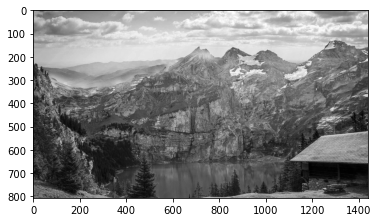

In [18]:

#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
from urllib.parse import unquote

urllib.request.urlretrieve(
  urllib.request.unquote('https://img.theculturetrip.com/1440x807/smart/wp-content/uploads/2017/08/mountains-1645078_1280.jpg'),
   "gfg.png")

im = Image.open('gfg.png')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several 
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline

### Plot image

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

Now, we will experiment using an edge detector kernel.


In [19]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map


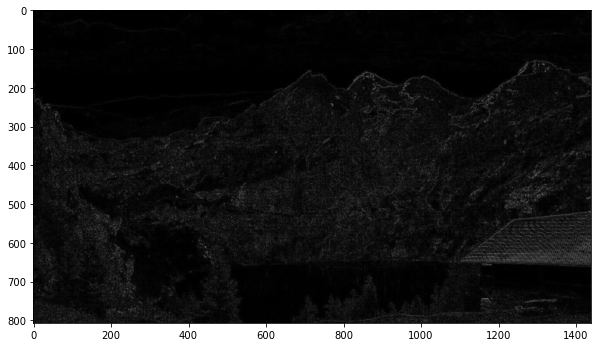

In [20]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')


In CNN, we would normally apply the process of normalization using the RELU function


In [22]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255


GRADIENT MAGNITUDE - Feature map


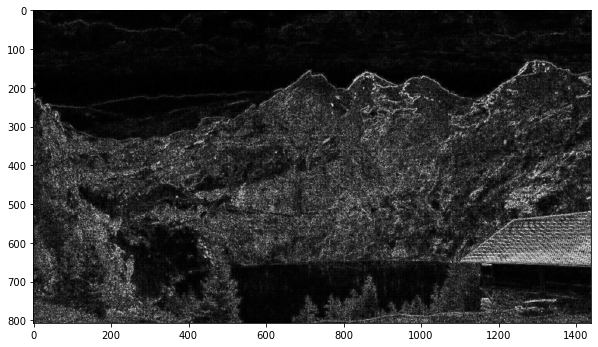

In [23]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

The classical example used for CNN, the handwritten number 3:


In [24]:
# download standard image
!wget --quiet https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg --output-document num3.jpg    


 Original type: <PIL.Image.Image image mode=L size=181x181 at 0x7F9062521F10> 


After conversion to numerical representation: 

 array([[26, 14, 12, ..., 11, 11, 11],
       [ 0,  0,  1, ...,  0,  0,  0],
       [12,  1,  0, ...,  0,  0,  0],
       ...,
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0]], dtype=uint8)

 Input image converted to gray scale: 



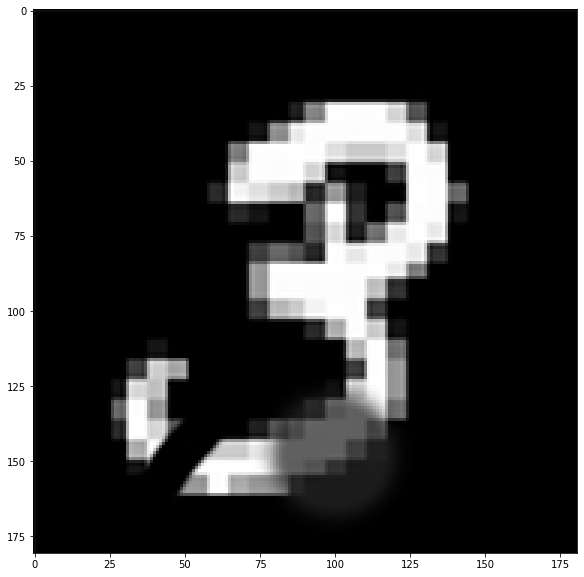

In [26]:

#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('num3.jpg')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several 
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline

### Plot image
fig, aux = plt.subplots(figsize=(10, 10))
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

Now, we will experiment using an edge detector kernel.


GRADIENT MAGNITUDE - Feature map


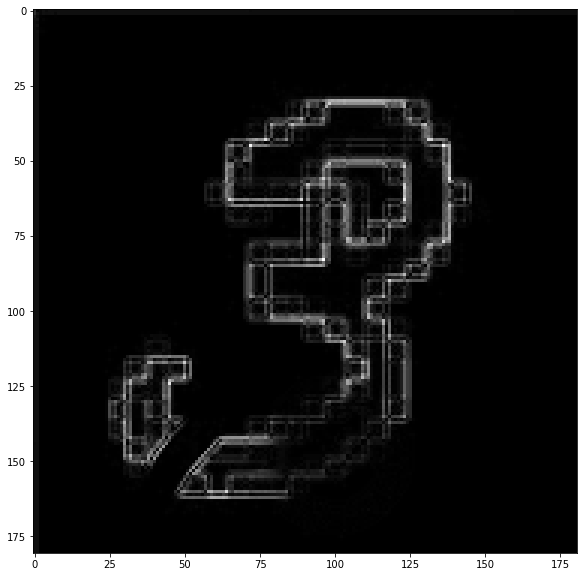

In [27]:
kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')
